## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

###  Домашнее задание №3. Обработка текстов. Линейная классификация.

Задание выполнил(а): _Шорыгина Татьяна_

### Общая информация
__Дата выдачи:__ 28.04.2019

__Дедлайн:__ 23:59 12.05.2019

### Оценивание и штрафы

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи
__Стирать условия нельзя!__

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_03_Фамилия_Имя.ipynb

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

В задании вам предоставлены реальные текстовые данные. 

Необходимо построить алгоритм, который будет по тексту документа определять тип источника:
 - Микроблоги
 - Новости
 - Отзывы
 - Форумы
 - Блоги
 - Видео
 - Мессенджеры

## Часть 1. Работа с текстовыми данными

 ### 1. Исследование данных

[2 балла]

Скачаем данные отсюда:
https://yadi.sk/d/o3cPgFAq5gALiw

In [2]:
D = pd.read_csv('texts_dataset.csv', sep=';', index_col=0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
D.head()

,Дата,ID сообщения,Заголовок,Текст,Дублей,Тип источника
0,27.04.2019 13:18,1396238,NaN,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",1.0,Микроблоги
1,27.04.2019 13:15,1396239,NaN,Почему Немагия сделала обзор на Тинькова? #нем...,1.0,Микроблоги
2,27.04.2019 13:10,1396248,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",2.0,Новости
3,27.04.2019 13:06,1396243,Forbes назвал самые экстравагантные инвестиции...,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",2.0,Новости
4,27.04.2019 13:03,1396186,Тинькофф Страхование: Не купить полис без подп...,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,1.0,Отзывы


Далее будем использовать лишь поля  "Текст", "Тип источника"

In [4]:
D = D[[ "Текст", "Тип источника"]]

In [5]:
D.head()

,Текст,Тип источника
0,"-Здравствуйте, тинькофф банк\n-Мать твою ебал\...",Микроблоги
1,Почему Немагия сделала обзор на Тинькова? #нем...,Микроблоги
2,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 57 ...",Новости
3,"13:01, 27.04.2019 \n\nПоделиться:\n\n \n 44 ...",Новости
4,Первый отзыв без оценки:&nbsp;\nhttps://www.ba...,Отзывы


In [6]:
for i in D['Тип источника'].unique():
    print (i)

Микроблоги
Новости
Отзывы
Форумы
Блоги
Видео
Мессенджеры
nan


In [7]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200206 entries, 0 to 200205
Data columns (total 2 columns):
Текст            199578 non-null object
Тип источника    199993 non-null object
dtypes: object(2)
memory usage: 4.6+ MB


Удалим объекты с пропусками

In [8]:
D.dropna(axis = 0, inplace=True)

#### 1.1 Выведите среднюю длину текстов в каждом классе. Что можно сказать о данных? Что можно сказать о каждом классе?

In [9]:
lens = []
names = []
for i in D['Тип источника'].unique():
    avg=num=0
    names+=[i]
    print('Средняя длина текстов в разделе "' + i + '":')
    for j in D[D['Тип источника'] == i]['Текст']:
        avg+=len(j.split())
        num+=1
    print(round(avg/num))
    lens+=[round(avg/num)]

Средняя длина текстов в разделе "Микроблоги":
23
Средняя длина текстов в разделе "Новости":
349
Средняя длина текстов в разделе "Отзывы":
81
Средняя длина текстов в разделе "Форумы":
69
Средняя длина текстов в разделе "Блоги":
484
Средняя длина текстов в разделе "Видео":
117
Средняя длина текстов в разделе "Мессенджеры":
130


Таким образом, можно отметить, что в ряде "Микроблоги - форумы - отзывы - видео - мессенджеры - новости - блоги" средняя длина текста возрастает.

Text(0.5, 1.0, 'Распределение средней длины текста')

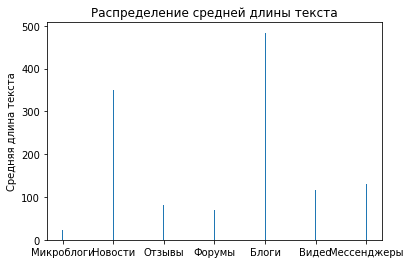

In [10]:
plt.figure()
plt.bar(names, lens, width=0.02)
plt.ylabel('Средняя длина текста')
plt.title('Распределение средней длины текста')

Из графика видно, что блоги и новости можно сразу отделить от остальных, их средняя длина текста намного больше.

#### 1.2 Приведите тексты к нижнему регистру и токенезируйте их

используйте word_tokenize из nltk.tokenize

In [11]:
from nltk.tokenize import word_tokenize

In [12]:
tokenized_text = []
for i in D['Текст']:
    s = []
    for j in i.lower().split('\n'):
        tokenized = word_tokenize(j)
        s+=tokenized
    tokenized_text+=s

In [13]:
tokenized_text[:20]

['-здравствуйте',
 ',',
 'тинькофф',
 'банк',
 '-мать',
 'твою',
 'ебал',
 '-спасибо',
 ',',
 'досвидания',
 'почему',
 'немагия',
 'сделала',
 'обзор',
 'на',
 'тинькова',
 '?',
 '#',
 'немагия',
 ',']

#### 1.3 Оставьте в каждом документе токены содержащие  только буквы русского или английского алфавита.


In [14]:
tokenized_text = []
for i in D['Текст']:
    s = []
    for j in i.lower().split('\n'):
        tokenized = [w for w in word_tokenize(j) if w.isalpha()]
        s+=tokenized
    tokenized_text+=s

In [15]:
tokenized_text[:20]

['тинькофф',
 'банк',
 'твою',
 'ебал',
 'досвидания',
 'почему',
 'немагия',
 'сделала',
 'обзор',
 'на',
 'тинькова',
 'немагия',
 'тиньков',
 'банк',
 'интернет',
 'блогеры',
 'https',
 'поделиться',
 'forbes',
 'назвал']

#### 1.4 Выведите 20 слов, которые встечаются в наибольшем числе документов. Что можно сказать об этих словах?

Уберём стоп-слова, не несущие смысла:

In [16]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian'))

In [17]:
tokenized_stopped = [w for w in tokenized_text if w not in stop_words]

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(tokenized_text)

In [19]:
def get_weights(cv):
    weights = sorted(cv.vocabulary_, key=lambda i: i[1])
    df_weights = pd.DataFrame(weights)#, columns=['ngram', 'weight'])
    return df_weights

In [20]:
t = cv.transform(tokenized_text).sum(axis=0)

In [21]:
words_freq = [(word, t[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq = pd.DataFrame(words_freq)

In [22]:
words_freq.head(20)

,0,1
0,на,493702
1,не,374042
2,по,258911
3,что,250718
4,nbsp,197102
5,банк,178802
6,тинькофф,156396
7,для,150319
8,за,143173
9,как,134793


#### 1.5 Выведите 20 слов, которые встечаются в наименьшем числе документов 

In [23]:
words_freq.tail(20)

,0,1
321560,автообмена,1
321561,вардер,1
321562,охеренный,1
321563,фейсу,1
321564,jagger,1
321565,психую,1
321566,устанлвлено,1
321567,кэшбжком,1
321568,повалится,1
321569,netesov,1


### 2. Подготовка данных

[3 балла]

####  2.1 Разделите выборку на обучающую и тестовую в соотношении 70:30

In [24]:
X = D['Текст']
y = D['Тип источника']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

#### 2.2 Обучите BOW векторы на обучающей выборке и примените преобразование к обучающей и тестовой

In [26]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('russian')

In [27]:
cv_vec1 = CountVectorizer()
X_train_cv1 = cv_vec1.fit_transform(X_train)
X_test_cv1 = cv_vec1.transform(X_test)

#### 2.3 Обучите TFIDF векторы на обучающей выборке и примените преобразование к тестовой

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf_vec1 = TfidfVectorizer()
X_train_tfidf1 = tfidf_vec1.fit_transform(X_train)
X_test_tfidf1 = tfidf_vec1.transform(X_test)

#### 2.4 Примените стемминг к текстам обучающей и тестовой выборки. Обучите TFIDF векторы на полученных данных.

In [30]:
X_train = X_train.apply(lambda x: ' '.join([stemmer.stem(w) for w in word_tokenize(x) if (w.isalpha() and w not in stop_words)]))
X_test = X_test.apply(lambda x: ' '.join([stemmer.stem(w) for w in word_tokenize(x) if (w.isalpha() and w not in stop_words)]))

In [31]:
X_train_tfidf2 = tfidf_vec1.fit_transform(X_train)
X_test_tfidf2 = tfidf_vec1.transform(X_test)

#### 2.5 Сравните размеры полученных матриц

In [32]:
X_train_cv1.shape, X_test_cv1.shape

((139697, 337396), (59871, 337396))

In [33]:
X_train_tfidf1.shape, X_test_tfidf1.shape

((139697, 337396), (59871, 337396))

In [34]:
X_train_tfidf2.shape, X_test_tfidf2.shape

((139697, 124341), (59871, 124341))

Размеры матриц, построенных на BoW- и TFIDF-векторах одинаковы, так как и число объектов совпадает. При стемминге у слов отбрасываются аффиксы, следовательно, объектов будет меньше, поэтому у матрицы, полученной на данных со стеммингом размер меньше.

### 3. Обучение модели и оценка результатов

[2 балла]

#### 3.1 Обучите логистическую регрессию SGDClassifier на данных, полученных в пунктах 2.2, 2.3 и 2.4.
#### Оцените качество на отложенной выборке по метрике accuracy

In [35]:
from sklearn.linear_model import SGDClassifier

In [36]:
clf_cv1 = SGDClassifier()
clf_cv1.fit(X_train_cv1, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [37]:
clf_tfidf1 = SGDClassifier()
clf_tfidf1.fit(X_train_tfidf1, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [38]:
clf_tfidf2 = SGDClassifier()
clf_tfidf2.fit(X_train_tfidf2, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

#### 3.2 Какой алгоритм показал наилучшее качество классификации? Как это можно объяснить?

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
print("SGDClassifier на данных BoW accuracy = ", accuracy_score(y_test, clf_cv1.predict(X_test_cv1)))
print("SGDClassifier на данных TFIDF accuracy = ", accuracy_score(y_test, clf_tfidf1.predict(X_test_tfidf1)))
print("SGDClassifier на данных TFIDF+stemming accuracy = ", accuracy_score(y_test, clf_tfidf2.predict(X_test_tfidf2)))

SGDClassifier на данных BoW accuracy =  0.8520318685173123
SGDClassifier на данных TFIDF accuracy =  0.8449666783584707
SGDClassifier на данных TFIDF+stemming accuracy =  0.8211321006831354


Обыкновенно стемминг должен увеличивать Accuracy, так как уменьшается число уникальных слов в тексте путём удаления аффиксов. С другой стороны, это изменение исходного текста, потеря слов (в том числе и некоторых важных). В данном случае стемминг не был полезен, но заранее угадать это было невозможно.

При применении BoW алгоритма каждое слово получает +1 к своему весу, когда встречается в очередном тексте. По сути, это просто подсчёт числа повторений слова во всех документах. TFIDF также учитывает важность слова (чем чаще слово появляется в одном документе и при этом реже в остальных - тем выше его важность, тем больше вес). Из данных о наиболее встречающихся во всех документах словах можно догадаться, что большая часть информации связана с банком "Тинькофф", следовательно, все тексты объединены единой темой. В данном случае полезнее будет BoW алгоритм, так как он не учитывает важность слова для конкретного текста, и на практике этот алгоритм показал наилучшее качество классификации.

#### 3.3 Выведите несколько документов из тестовой выборки, на которых были допущены ошибки. Что можно о них сказать?

In [41]:
predictions = clf_cv1.predict(X_test_cv1)

In [42]:
cnt = 0
for i in X_test[y_test != predictions]:
    print(cnt+1, ") ", i, sep='')
    if cnt > 7:
        break
    cnt+=1

1) как говор сообщен банк тинькофф центр разработк станет одн вендор биометрическ дан един биометрическ систем разработчик оператор котор явля ростелек
2) я мог подсказа не брат тинькоф райфайз восточн уральск банк реконструкц развит в принцип зп сбер бер зарплатник упрощен систем минимум бумаг врод уралсиб плох банк насчет друг мог сказа хот вчер обед баб руга совкомбанк главн соглаша кредитк процент соблазн снима деньг
3) в причин выбира банк ест адекватн альф тинькоф хот сбер кажд угл
4) сообщен SubaRed TCS Group Holding владелец акц тинькофф банк рассматрива ид запуск сервис заказ такс каршеринг доставк ед об сообщ владелец компан олег тиньк журналист по слов олег тиньков дан момент компан рассматрива околофинансов потребн котор связа транзакц счет карт покупк билет путешеств рестора пойд дальш сдела тинькофф такс зна хот мож млн клиент котор очен тесн обща мы могл прост предлож скидк наш такс сказа бизнесм олег тиньк добав компан един позиц дан вопрос част счита компан должн оста 

Можно заметить, что неверно классифицированные тексты отличаются либо краткостью (что мешает полноценному анализу), либо нехарактерной для данной категории длиной (к примеру, отзывы с количеством слов, намного превышающем среднее).

#### 3.4 Постройте матрицу ошибок. Проанализируйте ее.

In [43]:
import seaborn as sn
import matplotlib.pyplot as plt

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [45]:
class_names = D['Тип источника'].unique()

In [46]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = D['Тип источника'].unique()
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[[  510    80    25    72   441   114   347]
 [   15  2493    13   144    35   184   667]
 [   14    77   438    79   100    30   170]
 [    0    86     3  5639     0   187   525]
 [  142   125    32   204 10111   175   590]
 [   25    59     2    70    66 13259  1704]
 [   50   252    20   133   194  1608 18562]]
[[3.21e-01 5.03e-02 1.57e-02 4.53e-02 2.78e-01 7.17e-02 2.18e-01]
 [4.22e-03 7.02e-01 3.66e-03 4.06e-02 9.86e-03 5.18e-02 1.88e-01]
 [1.54e-02 8.48e-02 4.82e-01 8.70e-02 1.10e-01 3.30e-02 1.87e-01]
 [0.00e+00 1.34e-02 4.66e-04 8.76e-01 0.00e+00 2.90e-02 8.15e-02]
 [1.25e-02 1.10e-02 2.81e-03 1.79e-02 8.89e-01 1.54e-02 5.18e-02]
 [1.65e-03 3.89e-03 1.32e-04 4.61e-03 4.35e-03 8.73e-01 1.12e-01]
 [2.40e-03 1.21e-02 9.61e-04 6.39e-03 9.32e-03 7.72e-02 8.92e-01]]


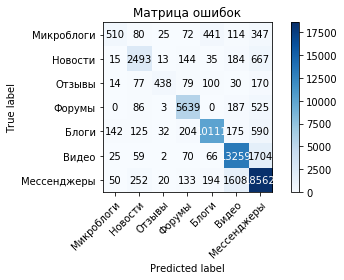

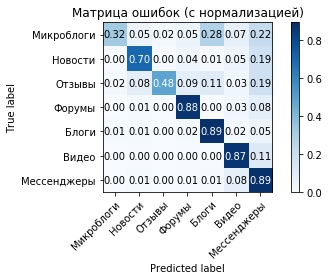

In [47]:
np.set_printoptions(precision=2)
plot_confusion_matrix(y_test, predictions, classes=class_names, title='Матрица ошибок')
plot_confusion_matrix(y_test, predictions, classes=class_names, normalize=True, title='Матрица ошибок (с нормализацией)')
plt.show()

Как видно из матрицы, хуже всего определяются микроблоги и отзывы. Микроблоги больше всего ошибочно определяются, как мессенджеры. Лучше всего (с наименьшим числом ошибочных предсказаний) определяются мессенджеры и форумы.

## Часть 2. Логистическая регрессия.
[3 балла]

Для наших экспериентов возьмём обучающую выборку [отсюда](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).

In [48]:
train = pd.read_csv('train.csv')

In [49]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [50]:
train.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [51]:
list(train)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

Решается задача многоклассовой классификации — определение ценовой категории телефона. Для простоты перейдём к задаче бинарной классификации — пусть исходные классы 0 и 1 соответствуют классу 0 новой целевой переменной, а остальные классу 1.
​
Замените целевую переменную, отделите её в отдельную переменную и удалите из исходной выборки.

In [52]:
target = train['price_range']
train = train.drop(['price_range'], axis=1)
labels = list(target.unique())

In [53]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


Разделите выборку на обучающую и тестовую части в соотношении 7 к 3. Для этого можно использовать `train_test_split` из scikit-learn. Не забудьте зафиксировать сид для разбиения.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=8)

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$

Не забывайте, что для линейных методов матрицу объекты-признаки необходимо предварительно нормировать (то есть привести каждый признак к одному и тому же масштабу одним из способов). Для этого можно воспользоваться `StandardScaler` или сделать это вручную.

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Обучите логистическую регрессию. Сделайте предсказания для тестовой части, посчитайте по ним ROC-AUC и Accuracy (порог 0.5). Хорошо ли удаётся предсказывать целевую переменную?
Не забывайте, что метод predict_proba вычисляет вероятности обоих классов выборки, а в бинарной классификации нас интересует в первую очередь вероятность принадлежности к положительному классу.

In [57]:
lr = LogisticRegression(tol=0.5, class_weight='balanced', random_state=8, solver='newton-cg', multi_class='ovr')#, warm_start=True)#, max_iter=1000)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(lr.predict_proba(train))

[[0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]
 ...
 [0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]]


In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [59]:
def roc_auc_score_multiclass(actual_class, pred_class, average = "weighted"):
    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        other_class = [x for x in unique_class if x != per_class]
    
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc

    return roc_auc_dict

In [60]:
print("ROC-AUC логистической регрессии")
lr_roc_auc_multiclass = roc_auc_score_multiclass(y_test, y_pred)
avg_rocauc = 0
for i in lr_roc_auc_multiclass:
    avg_rocauc+=lr_roc_auc_multiclass[i]
avg_rocauc/=len(set(y_test))
print(lr_roc_auc_multiclass)

ROC-AUC логистической регрессии
{0: 0.9756822373918116, 1: 0.8544664542123513, 2: 0.8595480759303235, 3: 0.9900221729490023}


In [61]:
print('Accuracy = ', accuracy_score(y_test, y_pred))
print('ROC-AUC (multiclass): ', lr_roc_auc_multiclass)
print('Average ROC-AUC = ', avg_rocauc)

Accuracy =  0.8766666666666667
ROC-AUC (multiclass):  {0: 0.9756822373918116, 1: 0.8544664542123513, 2: 0.8595480759303235, 3: 0.9900221729490023}
Average ROC-AUC =  0.9199297351208722


Целевая переменная предсказывается не очень удачно.

У обученной логистической регрессии есть два аттрибута: `coef_` и `intercept_`, которые соответствуют весам $w$ и $w_0$. Это и есть результат обучения логистической регрессии. Попробуйте с помощью них (с помощью всё той же обученной ранее логистической регрессии) посчитать "сырое" предсказание алгоритма $b(x)$. 

Постройте гистограмму полученных значений и ответьте на вопросы:
- Какие значения принимает такое предсказание?
- Похожи ли эти значения на вероятность классов?

In [62]:
bx = np.dot(train, lr.coef_.T)
bx += lr.intercept_

Text(0.5, 1.0, 'Распределение ценовых категорий телефонов')

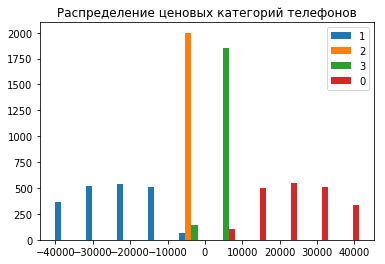

In [63]:
plt.figure()
plt.hist(bx)
plt.legend(labels)
plt.title('Распределение ценовых категорий телефонов')

Предсказание принимает отрицательные и положительные значения намного большие 1, которые мало похожи на корректные вероятности классов (хотя по сути ими являются). Применение сигмоиды к алгоритму должно решить данную проблему.

Реализуйте сигмоиду и постройте её график. Что вы можете сказать об этой функции?

In [64]:
x = np.linspace(-10, 10)

In [65]:
def sigm(x):
    return 1/(1 + np.exp(-x))

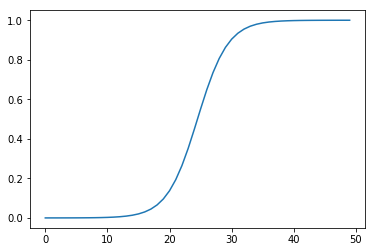

In [66]:
plt.plot(sigm(x))

Сигмоида всегда положительна (решает проблему отрицательной вероятности), а также решает проблему "бесконечного штрафа" - её минимальное значение 0, максимальное 1.

Примените реализованную сигмоиду к $b(x)$. Вы должны получить вероятности принадлежности к положительному классу. Проверьте, что ваши значения совпали с теми, которые получены с помощью `predict_proba`.

In [67]:
sigm(bx)

array([[0. , 0. , 0.5, 0.5],
       [0. , 0. , 0.5, 0.5],
       [0. , 0. , 0.5, 0.5],
       ...,
       [0. , 0. , 0.5, 0.5],
       [0. , 0. , 0.5, 0.5],
       [0. , 0. , 0.5, 0.5]])

In [68]:
print(lr.predict_proba(train))

[[0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]
 ...
 [0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]
 [0.  0.  0.5 0.5]]


In [69]:
np.array_equal(lr.predict_proba(train), sigm(bx))

True

Можно видеть, что полученные матрицы полностью совпадают.

Таким образом, обучение логистической регрессии — настройка параметров $w$ и $w_0$, а применение — подсчёт вероятностей принадлежности положительному классу как применение сигмоды к скалярному произведению признаков и параметров.

Постройте для обученной логистической регрессии ROC-кривую `roc_curve` и PR-кривую `precision_recall_curve`.

In [70]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize

In [71]:
y_test = label_binarize(y_test, classes=[0, 1, 2, 3])
n_classes = y_test.shape[1]

In [72]:
y_score = lr.decision_function(X_test)

In [73]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

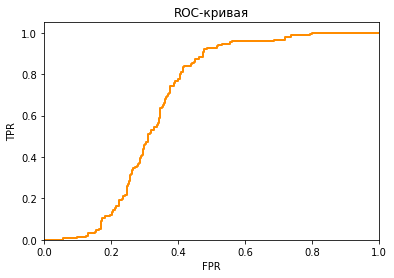

In [74]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC-кривая')
plt.show()

In [75]:
from sklearn.metrics import average_precision_score

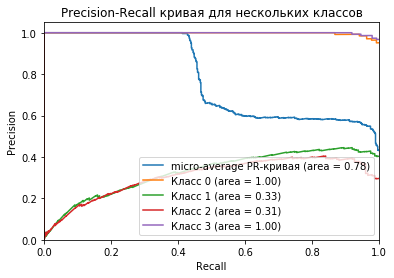

In [76]:
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")

plt.clf()
plt.plot(recall["micro"], precision["micro"],
         label='micro-average PR-кривая (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
for i in range(n_classes):
    plt.plot(recall[i], precision[i],
             label='Класс {0} (area = {1:0.2f})'
                   ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall кривая для нескольких классов')
plt.legend(loc="lower right")
plt.show()

### 4. Бонусное задание. Обучение логистической регрессии.

[2 бонусных балла]

В этой части вы будете обучать самый простой бинарный классификатор — логистическую регрессию. Будем использовать готовую реализацию `LogisticRegression` из scikit-learn.

Логистическая регрессия — линейный метод, то есть в нём предсказание алгоритма вычислаяется как скалярное произведение признаков и весов алгоритма: 

$$
b(x) = w_0 + \langle w, x \rangle = w_0 + \sum_{i=1}^{d} w_i x_i
$$

Для вычисления вероятности положительного класса применяется сигмода. В результате предсказание вероятности принадлежности объекта к положительному классу можно записать как: 

$$
P(y = +1 | x) = \frac{1}{1 + \exp(- w_0 - \langle w, x \rangle )}
$$



Если выше вручную мы только применяли логистическую регрессию, то здесь предлагается реализовать обучение с помощью полного градиентного спуска.
Если кратко, то обучение логистической регрессии с $L_2$-регуляризацией можно записать следующим образом:

$$
Q(w, X) = \frac{1}{l} \sum_{i=1}^{l} \log (1 + \exp(- y_i \langle w, x_i \rangle )) + \frac{\lambda_2}{2} \lVert w \rVert _2^2 \to \min_w
$$

Считаем, что $y_i \in \{-1, +1\}$, а нулевым признаком сделан единичный (то есть $w_0$ соответствует свободному члену). Искать $w$ будем с помощью градиентного спуска:

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla_w Q(w, X)
$$

В случае полного градиентного спуска $\nabla_w Q(w, X)$ считается напрямую (как есть, то есть, используя все объекты выборки). Длину шага $\alpha > 0$ в рамках данного задания предлагается брать равной некоторой малой константе.
Градиент по объекту $x_i$ считается по следующей формуле:

$$
\nabla_w Q(w, x_i) = - \frac{y_i x_i}{1 + \exp(y_i \langle w, x_i \rangle)} + \lambda_2 w
$$

На самом деле неправильно регуляризировать свободный член $w_0$ (то есть при добавлении градиента для $w_0$ не надо учитывать слагаемое с $\lambda_2$). Но в рамках этого задания мы не обращаем на это внимания и работаем со всеми вектором весов одинаково.

В качестве критерия останова необходимо использовать (одновременно):

- проверку на евклидовую норму разности весов на двух соседних итерациях (например, меньше некоторого малого числа порядка $10^{-6}$) — параметр tolerance
- достижение максимального числа итераций (например, 10000) — параметр max_iter.

Инициализировать веса можно случайным образом или нулевым вектором.

Реализуйте обучение логистической регрессии. Для удобства ниже предоставлен прототип с необходимыми методами. В loss_history необходимо сохранять вычисленное на каждой итерации значение функции потерь.

In [ ]:
from sklearn.base import BaseEstimator

class LogReg(BaseEstimator):
    def __init__(self, lambda_2=1.0, tolerance=1e-4, max_iter=1000, alpha=1e-3):
        """
        lambda_2: L2 regularization param
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        alpha: learning rate
        """
        self.lambda_2 = lambda_2
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.alpha = alpha
        self.w = None
        self.loss_history = None
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        self.loss_history = []
        
        pass
        
        return self
    
    def predict_proba(self, X):
        """
        X: np.array of shape (l, d)
        ---
        output: np.array of shape (l, 2) where
        first column has probabilities of -1
        second column has probabilities of +1
        """
        if self.w is None:
            raise Exception('Not trained yet')
        
        pass
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        pass

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        pass

- Примените логистическую регресиию на той же выборке.
- Посчитайте качество по тем же метрикам.
- Визуализируйте изменение значений функции потерь от номера итераций.

### 5. Бонусное задание 2. 

[0.002 бонусных балла]

Напишите свой любимый текстовый (у нас же домашнее задание про тексты, ощущаете иронию) мем или анекдот